In [2]:
#Importing important pachages into python

import pandas as pd
import numpy as np
import math
import operator
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Importing Algorithms

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score , precision_score , roc_auc_score ,roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

In [11]:
#calling the Iris dataset for we can do further analysis. Moreover, selecting the columns of data to analyse.

iris_df = load_iris()

x = pd.DataFrame(iris_df.data[:, :], columns = iris_df.feature_names[:])
y = pd.DataFrame(iris_df.target, columns = ["Species"])

y_array = y[:].to_numpy().ravel()

In [43]:
#Making multiple cross validation scores up to 20 times

tmp = [] #making an empty df to fill the values in 
n = 1
while n < 21:
    kNN_class = KNeighborsClassifier(n_neighbors = n)
    
    entropy_DT = DecisionTreeClassifier(criterion = "entropy")
    gini_DT = DecisionTreeClassifier()
    
    kNN_Cross_val = cross_val_score(kNN_class, x, y_array, scoring = "accuracy")
    entropy_DT_Cross_val = cross_val_score(entropy_DT, x, y_array, scoring = "accuracy")
    gini_DT_Cross_val = cross_val_score(entropy_DT, x, y_array, scoring = "accuracy")
    
    tmp.append(["K Nearest Neighbor and it's means", n, kNN_Cross_val.mean()]) #Here we are appending the dataframes together
    tmp.append(["Gini decision tree and it's means", n, gini_DT_Cross_val.mean()])
    tmp.append(["Entropy decision tree and it's means", n, entropy_DT_Cross_val.mean()])
    
    n += 1

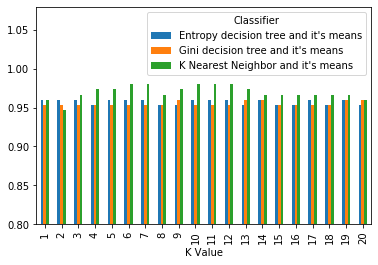

In [44]:
#Visualizing the results using a bar plot

#print(tmp) #checking to see is the tmp matrix was done properly this will be commented 


results_df = pd.DataFrame(data = tmp, columns = ["Classifier", "K Value", "Score"]) #remember this is case sensitive
results_df.pivot("K Value", "Classifier", "Score").plot(kind = "bar")

plt.ylim(0.8, 1.08) #Making it look presentable
plt.show()